# Vector Pipeline

## Setting Path

In [7]:
#Import sys to use other file paths in Notebook
import sys
sys.path.append('../Code Files')
sys.path.append('../Data')

## Import Libraries

In [28]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
from optimization import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd
import re
import scipy
import datetime

## Loading Synthetic Data 

In [106]:
import pickle
import dill

file= open("/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Closed_Form_Solver/Data/Bounded_Var_Time:2024-04-15 19:35:40, intercept:5,n_train:5000, n_test:1000, tensor_dimensions:[32 32], tensor_mode_ranks:[4 4], separation_rank:2.pkl", 'rb')
data = pickle.load(file)
file.close()

X_train_Full = data[0]
print(data[0].shape)

Y_train_Full = data[1].reshape(-1,1)
print(Y_train_Full.shape)

X_test_Full = data[2]
print(data[2].shape)

Y_test_Full = data[3].reshape(-1,1)
print(Y_test_Full.shape)

B_tensored = data[4]
print(data[4].shape)

tensor_dimensions = np.array([32, 32])
tensor_mode_ranks = np.array([4, 4])
separation_rank = 2

# loading the data from closed form solver

file= open("/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Vector Regression Baseline/Experimental Results/Vector_Base_Line/n_train_500,intercept_0,n_test_400, p1_32, p2_32, d1_4, d2_4, S_2,ExecutionTime_2024-05-09 17:20:18.pkl", 'rb')
experiment_data = pickle.load(file)
file.close()

#optimal function value from closed form solver
p_star = experiment_data[0]

print(f"Optimal funcation from closed form solver: {p_star}")







(5000, 32, 32)
(5000, 1)
(1000, 32, 32)
(1000, 1)
(32, 32)
Optimal funcation from closed form solver: 504.45330516929977


## Synthetic Data 

In [107]:
#Number of Training and Testing Data

n_train = 500
n_test = 400

# Generate random indices without replacement for training data
train_indices = np.random.choice(X_train_Full.shape[0], n_train, replace=False)

# Select the random samples and corresponding labels
X_train = X_train_Full[train_indices, :, :]
Y_train = Y_train_Full[train_indices]

# Assuming X_test_Full and Y_test_Full are your full testing dataset and labels
# and n_test is the number of samples you want to select randomly

# Generate random indices without replacement for testing data
test_indices = np.random.choice(X_test_Full.shape[0], n_test, replace=False)

# Select the random samples and corresponding labels
X_test = X_test_Full[test_indices, :, :]
Y_test = Y_test_Full[test_indices]

#Vectorize them!
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Initialize StandardScaler
scaler = StandardScaler() #standard scalar only

# Fit scaler on train data and transform train data
X_train_scaled = scaler.fit_transform(X_train)
#Transform test data using the scaler fitted on train data
X_test_scaled = scaler.transform(X_test)

#Reassign

X_train = X_train_scaled
X_test = X_test_scaled


## Set Global Lambda Parameter for Ridge Regression Tests

In [108]:
#Global Lambda Parameter for Ridge Regression Tests
lamb = 2
W_true = B_tensored.reshape(B_tensored.shape[0]*B_tensored.shape[1],1)

## Run Closed Form Solver

## Run Experiments

In [109]:
#Training 

lr = 0.00008
epochs = 25000
batch_size = 64
hypers = {'lambda': lamb, 'lr': lr, 'epochs': epochs, 'batch_size': 64, 'bias': True}
W_estimated, b_estimated, losses, gap_to_optimality, nee_values, nmse_values, corr_values, R2_values = SGD(X = X_train, Y = Y_train, cost_function_code = 1, hypers = hypers, p_star = p_star, W_true = W_true)

Epoch [1/25000], Loss: 3654068.0000, Gap to Optimality: 3653563.5467, NEE: 0.9961559930905507, NMSE: 0.9811402559280396, Correlation: 0.14084663763293218, R2: -12.744081252186447
Epoch [2/25000], Loss: 3584383.7500, Gap to Optimality: 3583879.2967, NEE: 0.9913106141836083, NMSE: 0.9624248743057251, Correlation: 0.18306471896153922, R2: -12.481910721616234
Epoch [3/25000], Loss: 3513308.2500, Gap to Optimality: 3512803.7967, NEE: 0.9857094381379821, NMSE: 0.9433347582817078, Correlation: 0.23527211939045323, R2: -12.214490857595736
Epoch [4/25000], Loss: 3436028.5000, Gap to Optimality: 3435524.0467, NEE: 0.9742570135068964, NMSE: 0.922580361366272, Correlation: 0.283839582003765, R2: -11.923757673679146
Epoch [5/25000], Loss: 3362556.0000, Gap to Optimality: 3362051.5467, NEE: 0.9623109676840809, NMSE: 0.9028468728065491, Correlation: 0.3271679307895287, R2: -11.647325142165482
Epoch [6/25000], Loss: 3304050.5000, Gap to Optimality: 3303546.0467, NEE: 0.9578279922685706, NMSE: 0.887131

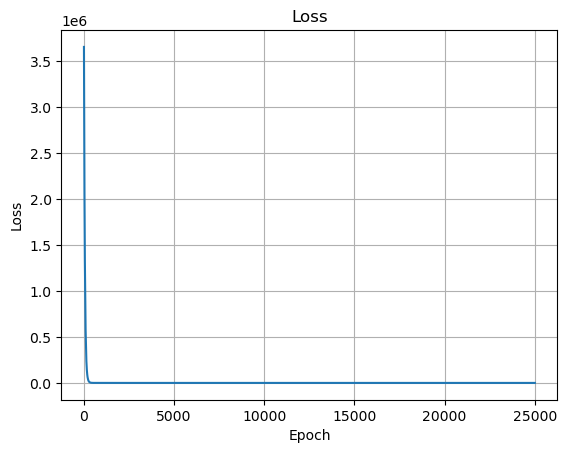

In [110]:
plt.plot(range(1, len(losses)+1), losses)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

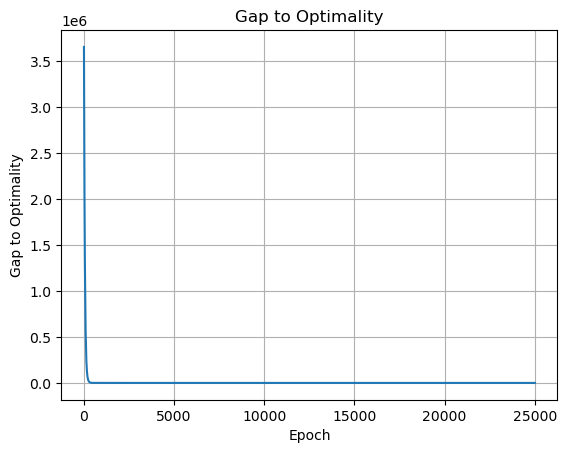

In [111]:
plt.plot(range(1, len(gap_to_optimality)+1), gap_to_optimality)
plt.title('Gap to Optimality')
plt.xlabel('Epoch')
plt.ylabel('Gap to Optimality')
plt.grid(True)
plt.show()

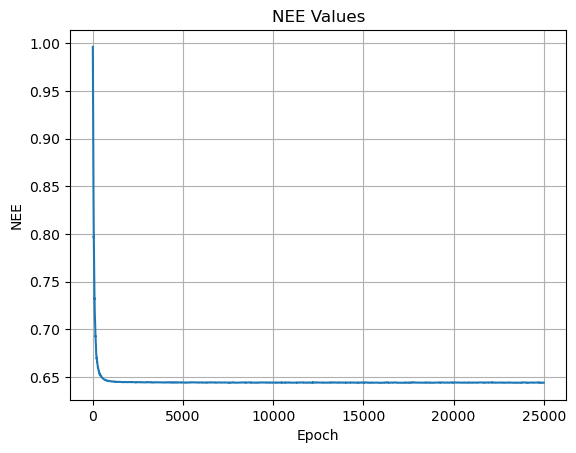

In [112]:
plt.plot(range(1, len(nee_values)+1), nee_values)
plt.title('NEE Values')
plt.xlabel('Epoch')
plt.ylabel('NEE')
plt.grid(True)
plt.show()

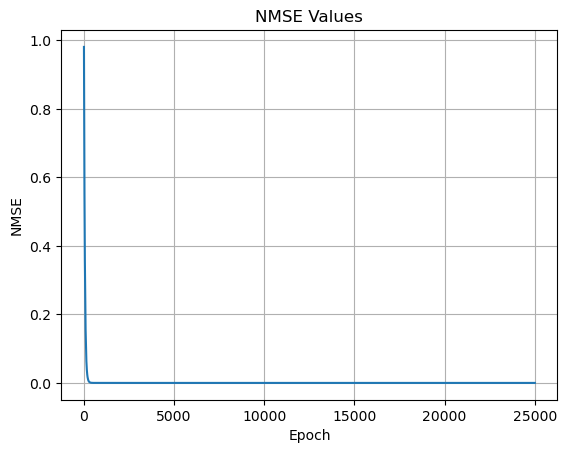

In [113]:
plt.plot(range(1, len(nmse_values)+1), nmse_values)
plt.title('NMSE Values')
plt.xlabel('Epoch')
plt.ylabel('NMSE')
plt.grid(True)
plt.show()

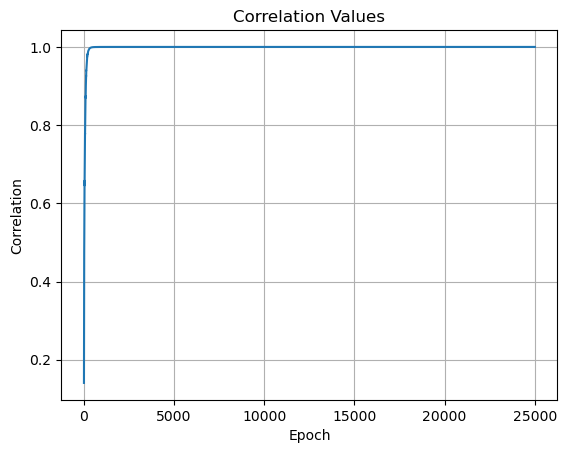

In [114]:
plt.plot(range(1, len(corr_values)+1), corr_values)
plt.title('Correlation Values')
plt.xlabel('Epoch')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

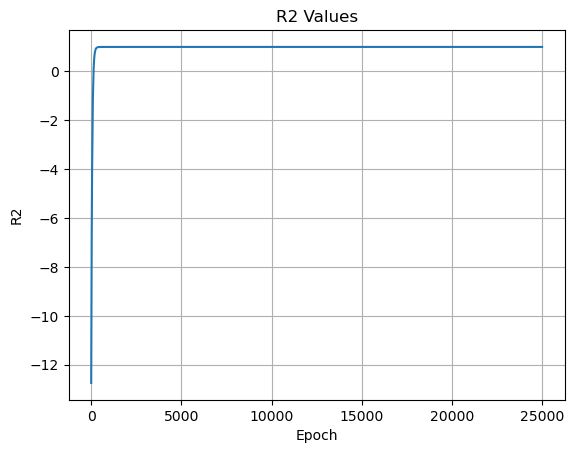

In [115]:
plt.plot(range(1, len(R2_values)+1), R2_values)
plt.title('R2 Values')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.grid(True)
plt.show()

-----------------------------Testing Error Metrics---------------------------------
NEE: 0.6441067473011136
NMSE: 0.031028325106502882
Correlation: 0.7297433518819945
R2_Score: 0.5325013211191179
Bias: 83.16486358642578


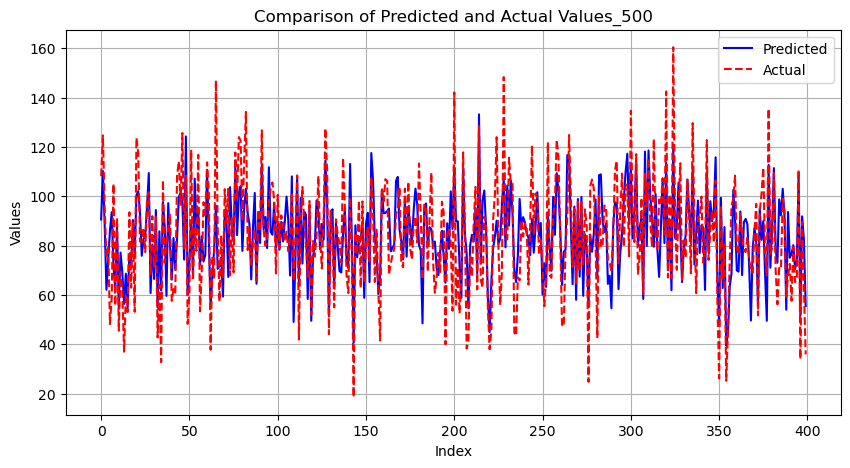

In [116]:
#Testing

weights = W_estimated
bias = b_estimated
Y_test_predicted = X_test @ W_estimated + bias

#Testing Accuracies

#Compute NEE, NMSE, Correlation, and R^2 Score
test_normalized_estimation_error = ((np.linalg.norm(W_estimated - W_true)) ** 2) /  ((np.linalg.norm(W_true)) ** 2)
test_nmse_loss = np.sum(np.square((Y_test_predicted - Y_test))) / np.sum(np.square(Y_test))
test_correlation = np.corrcoef(Y_test_predicted.flatten(), Y_test.flatten())[0, 1]
test_R2_score = r2_score(Y_test, Y_test_predicted)

error_metrics = [test_normalized_estimation_error,test_nmse_loss,test_correlation,test_R2_score]

print('-----------------------------Testing Error Metrics---------------------------------')
print(f"NEE: {test_normalized_estimation_error}")
print(f"NMSE: {test_nmse_loss}")
print(f"Correlation: {test_correlation}")
print(f"R2_Score: {test_R2_score}")
print(f"Bias: {bias}")

# Plotting both arrays
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(Y_test_predicted, label='Predicted', color='blue')  # Plot Y_test_predicted
plt.plot(Y_test, label='Actual', color='red', linestyle='--')  # Plot Y_test with dashed line
plt.title(f"Comparison of Predicted and Actual Values_{n_train}")  # Title of the plot
plt.xlabel('Index')  # Label for the x-axis
plt.ylabel('Values')  # Label for the y-axis
#plt.yscale('log')
plt.legend()  # Add a legend
plt.grid(True)  # Add gridlines for better readability
plt.show()  # Display the plot

#Get current time and store in variable
formatted_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
pkl_file = f"/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Vector Regression Baseline/Experimental Results/Vector_Base_Line/Stochastic Solver/n_train_{n_train},intercept_{bias},n_test_{n_test}, p1_32, p2_32, d1_4, d2_4, S_2,ExecutionTime_{formatted_time}.pkl"


with open(pkl_file, "wb") as file:
    dill.dump((p_star,lamb,error_metrics, W_estimated, b_estimated, losses, gap_to_optimality, nee_values, nmse_values, corr_values, R2_values), file)




In [56]:
print(n_train)

1100
